In [1]:
pip install sdss-marvin

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import marvin

[INFO]: No release version set. Setting default to DR17
[WARNING]: path /Users/dankk/sas/mangawork/manga/spectro/redux/v3_1_1/drpall-v3_1_1.fits cannot be found. Setting drpall to None. (MarvinUserWarning)
[WARNING]: path /Users/dankk/sas/mangawork/manga/spectro/analysis/v3_1_1/3.1.0/dapall-v3_1_1-3.1.0.fits cannot be found. Setting dapall to None. (MarvinUserWarning)


In [4]:
from marvin.tools import Maps

from marvin.tools import Cube

from marvin.tools import ModelCube

from marvin.tools import Image

In [5]:
maps = Maps('8131-9101')
cube = Cube('8131-9101')
modelcube = ModelCube(mangaid='1-604748')
image = Image('8131-9101')

[WARNING]: subprocess 18805 is still running (ResourceWarning)


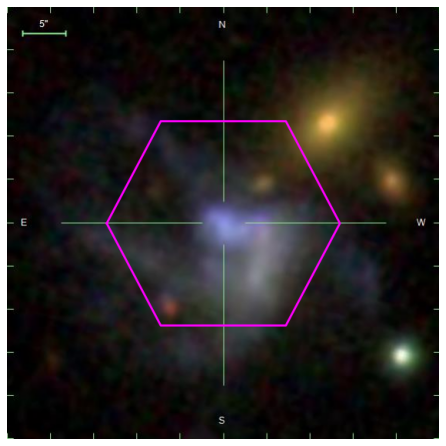

In [6]:
image.show()
image.plot()

In [7]:
modelcube.header

SIMPLE  = 'true    '           / conforms to FITS standard                      
BITPIX  = '8       '           / array data type                                
NAXIS   = '0       '           / number of array dimensions                     
EXTEND  = 'true    '                                                            
AUTHOR  = 'K Westfall <westfall@ucolick.org>'                                   
VERSDRP2= 'v3_1_1  '           / MaNGA DRP version (2d processing)              
VERSDRP3= 'v3_1_1  '           / MaNGA DRP Version (3d processing)              
VERSPLDS= 'v5_1    '           / Platedesign Version                            
VERSFLAT= 'v1_33   '           / Specflat Version                               
VERSCORE= 'v1_9_1  '           / MaNGAcore Version                              
VERSPRIM= 'v2_9    '           / MaNGA Preimaging Version                       
VERSUTIL= 'v5_5_36 '           / Version of idlutils                            
VERSIDL = 'x86_64 linux unix

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:title={'center':'Emission line Gaussian flux: H-alpha 6564'}, xlabel='spaxel', ylabel='spaxel'>)

[WARNING]: Warning: converting a masked element to nan. (UserWarning)


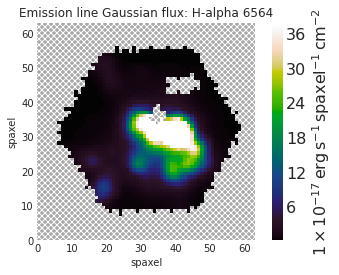

In [8]:
ha = maps.emline_gflux_ha_6564
ha.plot()

[WARNING]: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here. (DeprecationWarning)
[WARNING]: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information. (DeprecationWarning)
[WARNING]: The truth value of a Quantity is ambiguous. In the future this will raise a ValueError. (AstropyDeprecationWarning)


<AxesSubplot:xlabel='$\\mathrm{Wavelength}\\,[$$\\mathrm{\\mathring{A}}$$]$', ylabel='$\\mathrm{Flux}\\,[$$\\mathrm{1 \\times 10^{-17}\\,erg\\,\\mathring{A}^{-1}\\,s^{-1}\\,spaxel^{-1}\\,cm^{-2}}$$]$'>

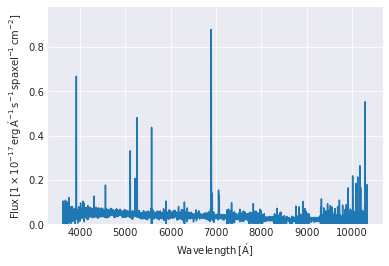

In [9]:
spax=cube[17,17]
spax.flux.plot()

[WARNING]: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here. (DeprecationWarning)
[WARNING]: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information. (DeprecationWarning)
[WARNING]: The truth value of a Quantity is ambiguous. In the future this will raise a ValueError. (AstropyDeprecationWarning)


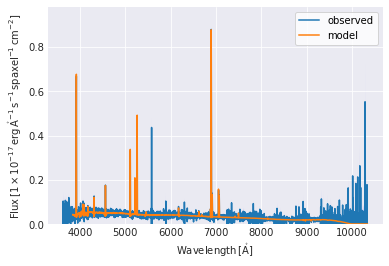

In [10]:
# must use Maps.getSpaxel() to get cube and modelcube
spax = maps.getSpaxel(x=17, y=17, xyorig='lower', cube=True, modelcube=True)

# mask out pixels lacking model fit
no_fit = ~spax.full_fit.masked.mask

# extra arguments to plot are passed to the matplotlib routine
ax = spax.flux.plot(label='observed')
ax.plot(spax.full_fit.wavelength[no_fit], spax.full_fit.value[no_fit], label='model')
ax.legend()

[WARNING]:  (MatplotlibDeprecationWarning)


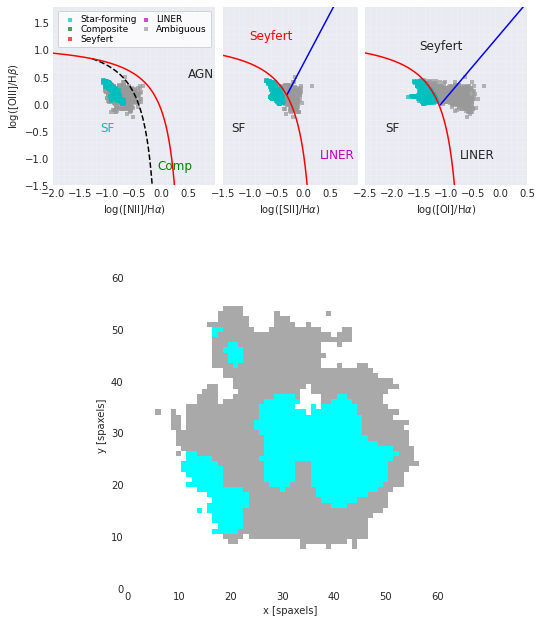

In [11]:
masks, fig, axes = maps.get_bpt()

[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: invalid value encountered in multiply (RuntimeWarning)
[WARNING]: Warning: converting a masked element to nan. (UserWarning)


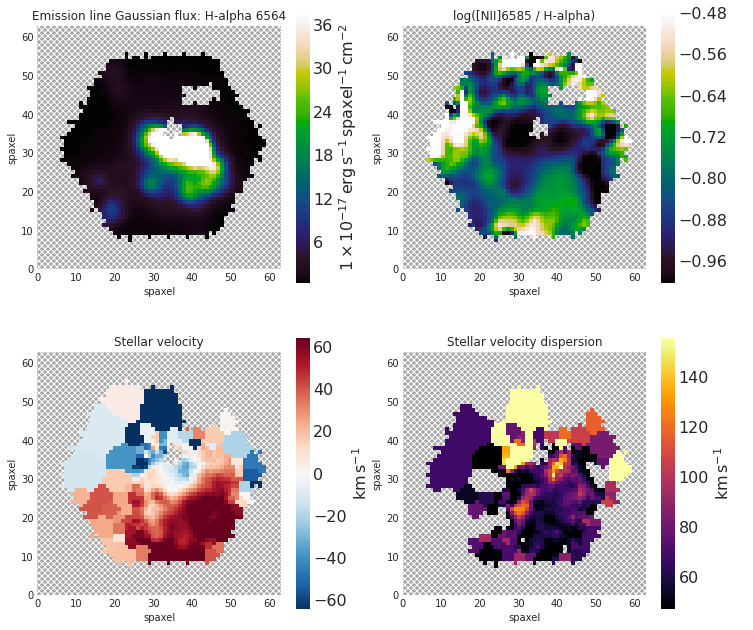

In [12]:
halpha = maps.emline_gflux_ha_6564
nii_ha = np.log10(maps.emline_gflux_nii_6585 / halpha)
stvel = maps.stellar_vel
stsig = maps.stellar_sigma
stsig_corr = stsig.inst_sigma_correction()

with plt.style.context('seaborn-darkgrid'):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 11))
    halpha.plot(fig=fig, ax=axes[0, 0])
    nii_ha.plot(fig=fig, ax=axes[0, 1], title="log([NII]6585 / H-alpha)", snr_min=None)
    stvel.plot(fig=fig, ax=axes[1, 0])
    stsig_corr.plot(fig=fig, ax=axes[1, 1])

(30.0, 40.0, 15.0, 25.0)

[WARNING]: Warning: converting a masked element to nan. (UserWarning)


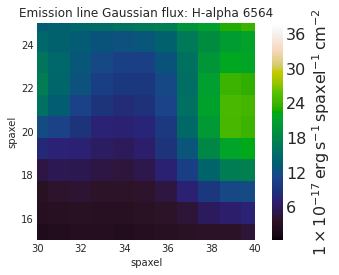

In [13]:
ha = maps.emline_gflux_ha_6564

fig, ax = ha.plot()
ax.axis([30,40,15,25])

[WARNING]: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here. (DeprecationWarning)
[WARNING]: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information. (DeprecationWarning)


Text(0, 0.5, 'flux [$\\mathrm{1 \\times 10^{-17}\\,\\frac{erg}{\\mathring{A}\\,s\\,spaxel\\,cm^{2}}}$]')

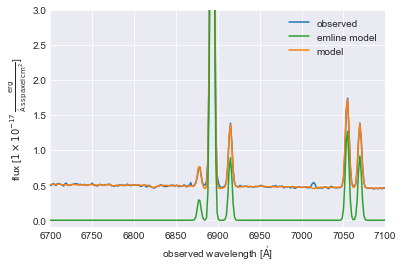

In [14]:
plt.style.use('seaborn-darkgrid')

spax = maps.getSpaxel(x=0, y=0, xyorig='center', cube=True, modelcube=True)

fig, ax = plt.subplots()

pObs = ax.plot(spax.flux.wavelength, spax.flux.value)
pModel = ax.plot(spax.full_fit.wavelength, spax.full_fit.value)
pEmline = ax.plot(spax.emline_fit.wavelength, spax.emline_fit.value)
plt.legend(pObs + pEmline + pModel, ['observed', 'emline model', 'model'])

ax.axis([6700, 7100, -0.1, 3])
ax.set_xlabel('observed wavelength [{}]'.format(spax.flux.wavelength.unit.to_string('latex')))
ax.set_ylabel('flux [{}]'.format(spax.flux.unit.to_string('latex')))

In [15]:
cube.header

CHECKSUM= '7HG5AFF40FF47FF4'   / HDU checksum updated 2020-12-03T00:23:40       
DATASUM = '799902251'          / data unit checksum updated 2020-12-03T00:23:40 
EXTNAME = 'FLUX    '                                                            
QUALDATA= 'MASK    '           / Mask extension name                            
ERRDATA = 'IVAR    '           / Error extension name                           
HDUCLAS2= 'DATA    '                                                            
HDUCLAS1= 'CUBE    '                                                            
HDUCLASS= 'SDSS    '           / SDSS format class                              
CUNIT2  = 'deg     '                                                            
CUNIT1  = 'deg     '                                                            
CTYPE2  = 'DEC--TAN'                                                            
CTYPE1  = 'RA---TAN'                                                            
CD2_2   = '0.000138889'     

In [16]:
cube.nsa

[WARNING]: cannot load NSA information for mangaid='1-604748'. (MarvinUserWarning)


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:title={'center':'Emission line Gaussian flux: H-alpha 6564'}, xlabel='spaxel', ylabel='spaxel'>)

[WARNING]: Warning: converting a masked element to nan. (UserWarning)


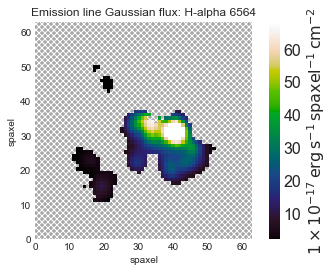

In [17]:
masks = maps.get_bpt(show_plot=False, return_figure=False)

# Create a bitmask for non-star-forming spaxels by taking the
# complement (`~`) of the BPT global star-forming mask (where True == star-forming)
# and set bit 30 (DONOTUSE) for those spaxels.
mask_non_sf = ~masks['sf']['global'] * ha.pixmask.labels_to_value('DONOTUSE')

# Do a bitwise OR between DAP mask and non-star-forming mask.
mask = ha.mask | mask_non_sf

ha.plot(mask=mask)

In [18]:
maps.datamodel

[<Property 'spx_skycoo', channel='on_sky_x', release='3.1.0', unit='arcsec'>,
 <Property 'spx_skycoo', channel='on_sky_y', release='3.1.0', unit='arcsec'>,
 <Property 'spx_ellcoo', channel='elliptical_radius', release='3.1.0', unit='arcsec'>,
 <Property 'spx_ellcoo', channel='r_re', release='3.1.0', unit=''>,
 <Property 'spx_ellcoo', channel='r_h_kpc', release='3.1.0', unit='kpc / h'>,
 <Property 'spx_ellcoo', channel='elliptical_azimuth', release='3.1.0', unit='deg'>,
 <Property 'spx_mflux', channel='None', release='3.1.0', unit='1e-17 erg / (cm2 s spaxel)'>,
 <Property 'spx_snr', channel='None', release='3.1.0', unit=''>,
 <Property 'binid', channel='binned_spectra', release='3.1.0', unit=''>,
 <Property 'binid', channel='stellar_continua', release='3.1.0', unit=''>,
 <Property 'binid', channel='em_line_moments', release='3.1.0', unit=''>,
 <Property 'binid', channel='em_line_models', release='3.1.0', unit=''>,
 <Property 'binid', channel='spectral_indices', release='3.1.0', unit=''>